<a href="https://colab.research.google.com/github/conrad442/ETHdroidBot/blob/master/DSC2001_W9_2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터사이언스개론 9주차 수업 (목요일)

# 새 섹션

In [ ]:
# 나눔폰트를 설치하기 (설치 후 Runtime을 재실행 해야 한글을 출력할 수 있습니다.)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
# 필요한 모듈 불러오기 
import pandas as pd 
import numpy as np
import math 
import random
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
# Matplotlib에 특정한글 폰트를 사용하라고 지정
plt.rc('font', family='NanumBarunGothic')  

## 모집단(Population)과 표본(Sample)의 관계

모집단과 표본과의 관계를 위해서 우선 모집단을 생성해보도록 하겠습니다. `numpy`모듈의 `random.randint`를 사용하면 임의의 정수를 n개 만큼 생성해 낼 수 있습니다. 

```
#형식
np.random.randint(작은값, 큰값, 사이즈)
```

In [ ]:
# 0과 1000사이의 임의의수 10000개 생성 
list_a = np.random.randint(0,1000, 10000)

In [ ]:
print('모집단의 평균은 {:.3f}이고, 표준 편차는 {:.3f}입니다.'.format(list_a.mean(), list_a.std()))

모집단의 평균은 500.210이고, 표준 편차는 292.431입니다.


참조 

```
list_a[np.random.randint(list_a.shape[0], size=10)] 
```

np.array에서 10개의 수를 임의로 뽑는 코드 

In [ ]:
# 10개를 뽑는 경우 
sample_a = []
for i in range(1, 10): 
  sample = list_a[np.random.randint(list_a.shape[0], size=10)] 
  print("{}번째로 10개의 샘플을 뽑았을 때 평균: {:.3f} / 표준편차: {:.3f}".format(i, sample.mean(), sample.std()))
  sample_a.append(sample.mean())

1번째로 10개의 샘플을 뽑았을 때 평균: 486.600 / 표준편차: 317.640
2번째로 10개의 샘플을 뽑았을 때 평균: 485.400 / 표준편차: 296.461
3번째로 10개의 샘플을 뽑았을 때 평균: 628.400 / 표준편차: 253.871
4번째로 10개의 샘플을 뽑았을 때 평균: 399.200 / 표준편차: 324.510
5번째로 10개의 샘플을 뽑았을 때 평균: 535.700 / 표준편차: 247.556
6번째로 10개의 샘플을 뽑았을 때 평균: 489.900 / 표준편차: 218.683
7번째로 10개의 샘플을 뽑았을 때 평균: 502.400 / 표준편차: 240.352
8번째로 10개의 샘플을 뽑았을 때 평균: 444.000 / 표준편차: 313.834
9번째로 10개의 샘플을 뽑았을 때 평균: 468.300 / 표준편차: 323.432


In [ ]:
# 100개를 뽑는 경우 
sample_b = []
for i in range(1, 10): 
  sample = list_a[np.random.randint(list_a.shape[0], size=100)] 
  print("{}번째로 100개의 샘플을 뽑았을 때 평균: {:.3f} / 표준편차: {:.3f}".format(i, sample.mean(), sample.std()))
  sample_b.append(sample.mean())

1번째로 100개의 샘플을 뽑았을 때 평균: 498.440 / 표준편차: 292.349
2번째로 100개의 샘플을 뽑았을 때 평균: 482.250 / 표준편차: 292.075
3번째로 100개의 샘플을 뽑았을 때 평균: 465.400 / 표준편차: 295.627
4번째로 100개의 샘플을 뽑았을 때 평균: 558.780 / 표준편차: 283.716
5번째로 100개의 샘플을 뽑았을 때 평균: 493.640 / 표준편차: 304.410
6번째로 100개의 샘플을 뽑았을 때 평균: 536.330 / 표준편차: 302.394
7번째로 100개의 샘플을 뽑았을 때 평균: 496.730 / 표준편차: 281.222
8번째로 100개의 샘플을 뽑았을 때 평균: 477.070 / 표준편차: 302.383
9번째로 100개의 샘플을 뽑았을 때 평균: 439.180 / 표준편차: 266.061


In [ ]:
# 1000개를 뽑는 경우 
sample_c = []
for i in range(1, 10): 
  sample = list_a[np.random.randint(list_a.shape[0], size=1000)] 
  print("{}번째로 1000개의 샘플을 뽑았을 때 평균: {:.3f} / 표준편차: {:.3f}".format(i, sample.mean(), sample.std()))
  sample_c.append(sample.mean())

1번째로 1000개의 샘플을 뽑았을 때 평균: 508.114 / 표준편차: 290.786
2번째로 1000개의 샘플을 뽑았을 때 평균: 495.889 / 표준편차: 299.976
3번째로 1000개의 샘플을 뽑았을 때 평균: 504.972 / 표준편차: 299.890
4번째로 1000개의 샘플을 뽑았을 때 평균: 497.212 / 표준편차: 296.966
5번째로 1000개의 샘플을 뽑았을 때 평균: 476.382 / 표준편차: 290.279
6번째로 1000개의 샘플을 뽑았을 때 평균: 497.411 / 표준편차: 295.779
7번째로 1000개의 샘플을 뽑았을 때 평균: 482.926 / 표준편차: 295.027
8번째로 1000개의 샘플을 뽑았을 때 평균: 499.981 / 표준편차: 297.932
9번째로 1000개의 샘플을 뽑았을 때 평균: 490.875 / 표준편차: 293.467


In [ ]:
sample_a = np.array(sample_a)
sample_b = np.array(sample_b)
sample_c = np.array(sample_c)

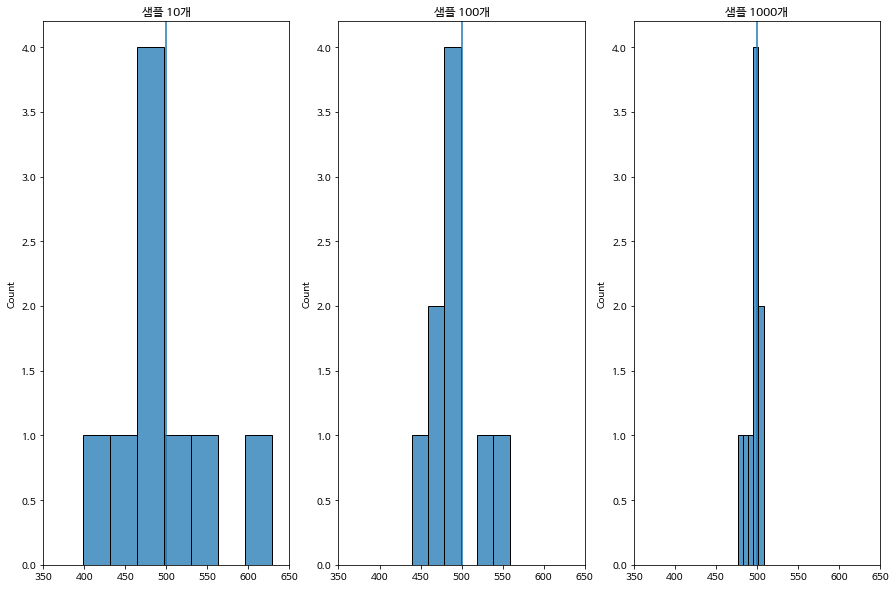

In [ ]:
# 분산에 따른 데이터 분포의 차이 
figure, axs = plt.subplots(ncols=3) # 총 네 개의 이미지 표시
figure.set_size_inches(15,10) # 캔번스(전반적인 이미지) 사이즈 바꾸기 

ax1 = sns.histplot(sample_a, ax=axs[0])
ax2 = sns.histplot(sample_b, ax=axs[1])
ax3 = sns.histplot(sample_c, ax=axs[2])

ax1.set(xlim=(350,650), title='샘플 10개')
ax2.set(xlim=(350,650), title='샘플 100개')
ax3.set(xlim=(350,650), title='샘플 1000개')

for ax in [ax1, ax2, ax3]:
    ax.axvline(500.21)

## 정규분포

`numpy` 모듈의 `random` 모듈을 사용하면 특정 분포에 맞는 데이터를 임의로 생성이 가능합니다. 이 때 `normal(loc, scale, size)`을 사용하면 `loc`을 중심으로 `scale` 표준 편차 만큼 퍼진 정규분포에 속한 값들 `size`개수 만큼의 백터를 생성합니다. 

```
#형식
np.random.normal(0, 1, 1000)
```

### 분산이 갖고 평균이 다른 정규분포들

In [ ]:
# 분산이 갖고 평균이 다른 정규분포 4개
np0a = np.random.normal(0, 1, 1000)
np1a = np.random.normal(5, 1, 1000)
np2a = np.random.normal(-10, 1, 1000)
np3a = np.random.normal(10, 1, 1000)

[(-40.0, 40.0)]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


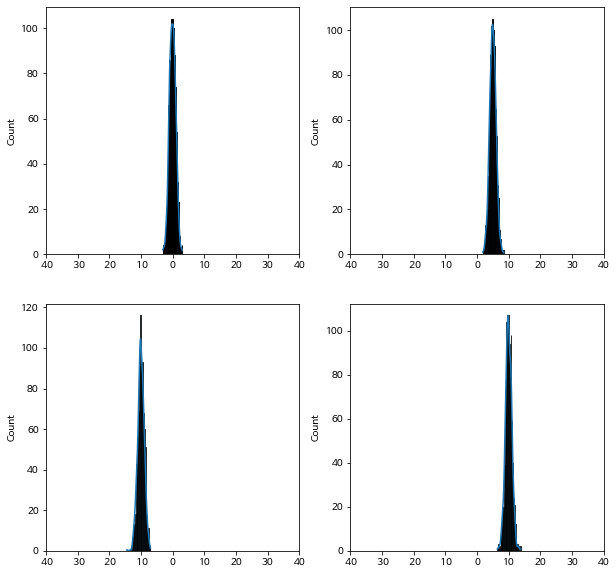

In [ ]:
# 분산에 따른 데이터 분포의 차이 
figure, axs = plt.subplots(nrows=2, ncols=2) # 총 네 개의 이미지 표시
figure.set_size_inches(10,10) # 캔번스(전반적인 이미지) 사이즈 바꾸기 

sns.histplot(x=np0a, ax=axs[0,0], kde=True).set(xlim=(-40, 40)) # xlim 은 x축의 범위를 정하는 경우 
sns.histplot(x=np1a, ax=axs[0,1], kde=True).set(xlim=(-40, 40))
sns.histplot(x=np2a, ax=axs[1,0], kde=True).set(xlim=(-40, 40))
sns.histplot(x=np3a, ax=axs[1,1], kde=True).set(xlim=(-40, 40))

In [ ]:
np0.std()

1.005112575187251

###평균이 갖고 분산이 다른 정규분포들

In [ ]:
# 평균이 갖고 분산이 각기 다른 정규분포 4개 
np0b = np.random.normal(0, 1, 1000)
np1b = np.random.normal(0, 0.25, 1000)
np2b = np.random.normal(0, 5, 1000)
np3b = np.random.normal(0, 10, 1000)

[(-40.0, 40.0)]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


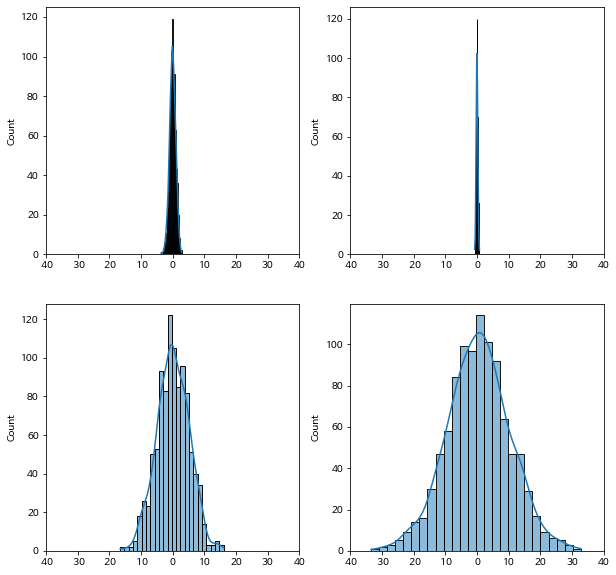

In [ ]:
# 분산에 따른 데이터 분포의 차이 
figure, axs = plt.subplots(nrows=2, ncols=2) # 총 네 개의 이미지 표시
figure.set_size_inches(10,10) # 캔번스(전반적인 이미지) 사이즈 바꾸기 

sns.histplot(x=np0b, ax=axs[0,0], kde=True).set(xlim=(-40, 40)) # xlim 은 x축의 범위를 정하는 경우 
sns.histplot(x=np1b, ax=axs[0,1], kde=True).set(xlim=(-40, 40))
sns.histplot(x=np2b, ax=axs[1,0], kde=True).set(xlim=(-40, 40))
sns.histplot(x=np3b, ax=axs[1,1], kde=True).set(xlim=(-40, 40))

## 확률계산 

### Z 변환 

어떠한 값을 z 분포로 변환시키기 위해서는 다음과 같이 `z 변환`을 실시합니다. 이 때 z 값은 평균이 0이고 표준편차가 1인 정규분포에서 해당값의 위치를 나타냅니다. 

$$ z = \frac{X - \mu}{\sigma} $$

예를들어, 평균이 170이고 표준편차가 5.3 인 정규분포에서 173 의 z 값은 $ z = \frac{173-170}{5.3} = 0.56$ 입니다. 

In [ ]:
value, mu, std = 173, 170, 5.3 

print("{}의 z 값은 {:.3f} 입니다".format(value, (value-mu)/std))

173의 z 값은 0.566 입니다


###Z 변환을 사용한 후 정규 분포의 모습

In [ ]:
df = pd.DataFrame({'value0':np0a,
                   'value1':np1a,
                   'value2':np1b,
                   'value3':np2b,
                   'value4':np3b})

In [ ]:
df.head()

,value0,value1,value2,value3,value4
0,-1.461932,3.182299,0.142582,-7.710860,-10.551499
1,-1.075937,4.916905,0.036666,4.211436,-23.502222
2,0.341914,5.790595,-0.042311,-5.861842,3.343812
3,0.918121,4.034618,-0.390372,-12.665269,11.266353
4,0.698767,3.981726,-0.333409,-5.077798,-11.519172


In [ ]:
df.describe()

,value0,value1,value2,value3,value4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.036232,4.986486,-0.000941,0.103329,0.464784
std,0.992970,0.999639,0.263266,5.063586,9.882796
min,-3.102342,1.815767,-0.744317,-16.568786,-33.437524
25%,-0.756939,4.315710,-0.179599,-3.388406,-5.995934
50%,-0.042457,4.980091,-0.010152,-0.011734,0.531659
75%,0.652563,5.662539,0.176157,3.609017,6.816877
max,3.075190,8.471128,0.776942,16.073976,32.755845


In [ ]:
# 표준 정규분포로 변환 (z transformation)
df['value1_z'] = (df['value1'] - df['value1'].mean())/df['value1'].std()

In [ ]:
# 표준 정규분포로 변환 (z transformation)
df['value2_z'] = (df['value2'] - df['value2'].mean())/df['value2'].std()

In [ ]:
df['value3_z'] = (df['value3'] - df['value3'].mean())/df['value3'].std()

In [ ]:
df['value4_z'] = (df['value4'] - df['value4'].mean())/df['value4'].std()

In [ ]:
df.describe()

,value0,value1,value2,value3,value4,value1_z,value2_z,value3_z,value4_z
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-0.036232,4.986486,-0.000941,0.103329,0.464784,-6.286777e-16,-5.329071e-18,1.909584e-17,-1.815215e-17
std,0.992970,0.999639,0.263266,5.063586,9.882796,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.102342,1.815767,-0.744317,-16.568786,-33.437524,-3.171863e+00,-2.823669e+00,-3.292551e+00,-3.430437e+00
25%,-0.756939,4.315710,-0.179599,-3.388406,-5.995934,-6.710177e-01,-6.786204e-01,-6.895776e-01,-6.537338e-01
50%,-0.042457,4.980091,-0.010152,-0.011734,0.531659,-6.397295e-03,-3.498876e-02,-2.272376e-02,6.766875e-03
75%,0.652563,5.662539,0.176157,3.609017,6.816877,6.762974e-01,6.726963e-01,6.923330e-01,6.427425e-01
max,3.075190,8.471128,0.776942,16.073976,32.755845,3.485899e+00,2.954740e+00,3.154019e+00,3.267401e+00


In [ ]:
df.describe()

,value0,value1,value2,value3,value4,value1_z,value2_z,value3_z,value4_z
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-0.036232,4.986486,-0.000941,0.103329,0.464784,-6.286777e-16,-5.329071e-18,1.909584e-17,-1.815215e-17
std,0.992970,0.999639,0.263266,5.063586,9.882796,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.102342,1.815767,-0.744317,-16.568786,-33.437524,-3.171863e+00,-2.823669e+00,-3.292551e+00,-3.430437e+00
25%,-0.756939,4.315710,-0.179599,-3.388406,-5.995934,-6.710177e-01,-6.786204e-01,-6.895776e-01,-6.537338e-01
50%,-0.042457,4.980091,-0.010152,-0.011734,0.531659,-6.397295e-03,-3.498876e-02,-2.272376e-02,6.766875e-03
75%,0.652563,5.662539,0.176157,3.609017,6.816877,6.762974e-01,6.726963e-01,6.923330e-01,6.427425e-01
max,3.075190,8.471128,0.776942,16.073976,32.755845,3.485899e+00,2.954740e+00,3.154019e+00,3.267401e+00


`z 변환`을 사용하면 평균과 분산이 다른 두 정규 분포에 위치한 값의 상대적 위치를 비교할 수 있습니다. 

In [ ]:
# z 변환 이전의 0 보다 작은 값 확인 
df[df['value1']>0]['value1'].count()

1000

In [ ]:
# z 변환 이후의 0보다 큰 값 확인 
df[df['value1_z']>0]['value1_z'].count()

496

[(-10.0, 10.0)]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


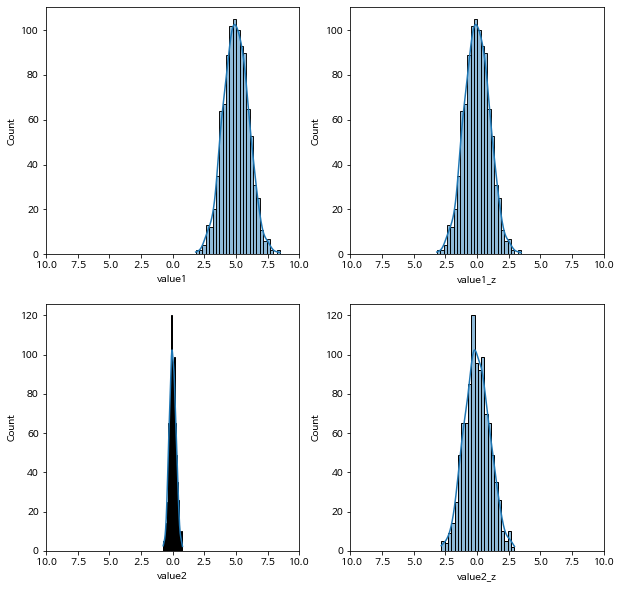

In [ ]:
#z변환 분포 비교 
figure, axs = plt.subplots(nrows=2, ncols=2) # 총 네 개의 이미지 표시
figure.set_size_inches(10,10) # 캔번스(전반적인 이미지) 사이즈 바꾸기 

sns.histplot(x=df['value1'], ax=axs[0,0], kde=True).set(xlim=(-10, 10)) # xlim 은 x축의 범위를 정하는 경우 
sns.histplot(x=df['value1_z'], ax=axs[0,1], kde=True).set(xlim=(-10, 10)) # xlim 은 x축의 범위를 정하는 경우 
sns.histplot(x=df['value2'], ax=axs[1,0], kde=True).set(xlim=(-10, 10)) # xlim 은 x축의 범위를 정하는 경우 
sns.histplot(x=df['value2_z'], ax=axs[1,1], kde=True).set(xlim=(-10, 10)) # xlim 은 x축의 범위를 정하는 경우 

In [ ]:
df['value2'].std()

0.26326610076668383

### Z 변환이후의 분포 

[(-4.0, 4.0)]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


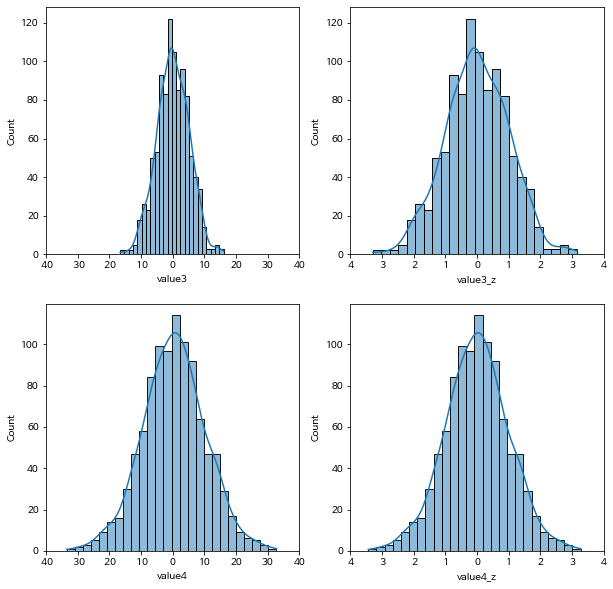

In [ ]:
#z변환 분포 비교 
figure, axs = plt.subplots(nrows=2, ncols=2) # 총 네 개의 이미지 표시
figure.set_size_inches(10,10) # 캔번스(전반적인 이미지) 사이즈 바꾸기 

sns.histplot(x=df['value3'], ax=axs[0,0], kde=True).set(xlim=(-40, 40)) # xlim 은 x축의 범위를 정하는 경우 
sns.histplot(x=df['value3_z'], ax=axs[0,1], kde=True).set(xlim=(-4, 4)) # xlim 은 x축의 범위를 정하는 경우 
sns.histplot(x=df['value4'], ax=axs[1,0], kde=True).set(xlim=(-40, 40)) # xlim 은 x축의 범위를 정하는 경우 
sns.histplot(x=df['value4_z'], ax=axs[1,1], kde=True).set(xlim=(-4, 4)) # xlim 은 x축의 범위를 정하는 경우 

###표준 정규 분포 표

아래는 각 z 값과 연계된 표준정규분포 아래의 면적을 나타냅니다. 


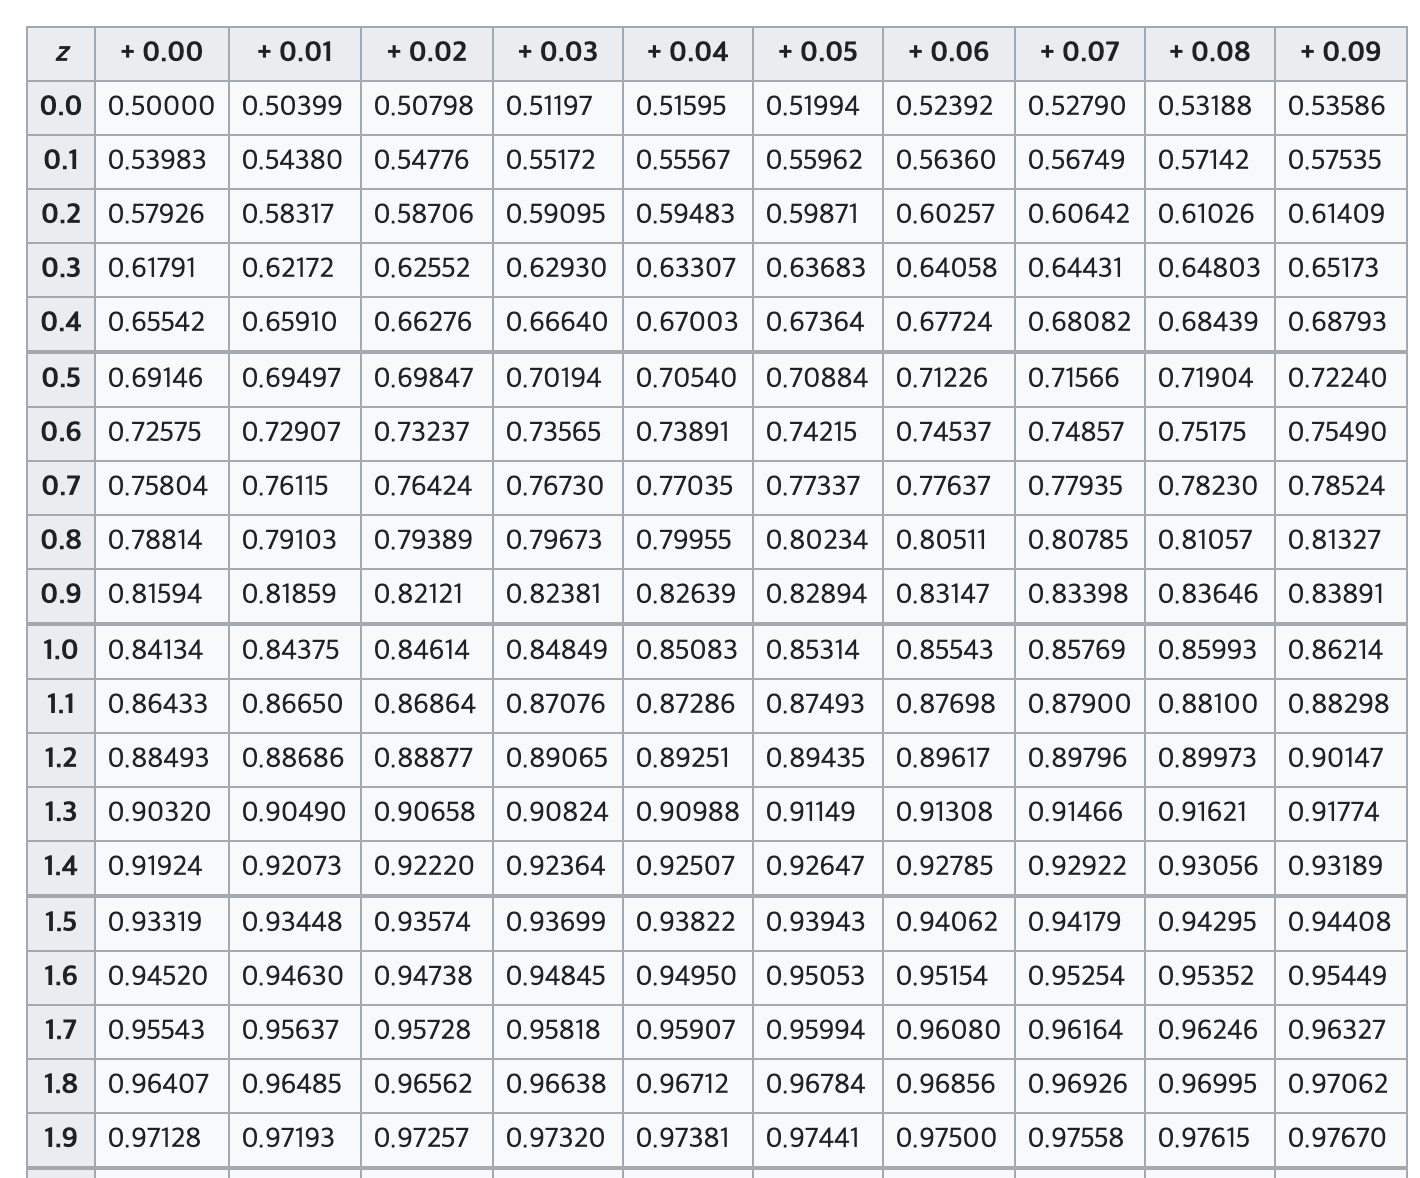

표준정규분포곡선에서 z 값이 1.96보다 작은 면적은 0.975입니다. 실제로 이와 비슷하게 나오는지 계산을 통해 살펴보도록 하겠습니다. 

In [ ]:
# 표준 정규 분포를 따르는 10000개의 임의 숫자를 생성
np0 = np.random.normal(0, 1, 10000)


In [ ]:
# Z 점수에 따라 데이터 분리
np0_a = np0[(np0<1.96)]
np0_b = np0[(np0>=1.96)]
counts, bins = np.histogram(np0, bins=100)

In [ ]:
# Z값이 1.96보다 큰 값들의 확률 구하기
len(np0_b)/len(np0)

0.0254

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


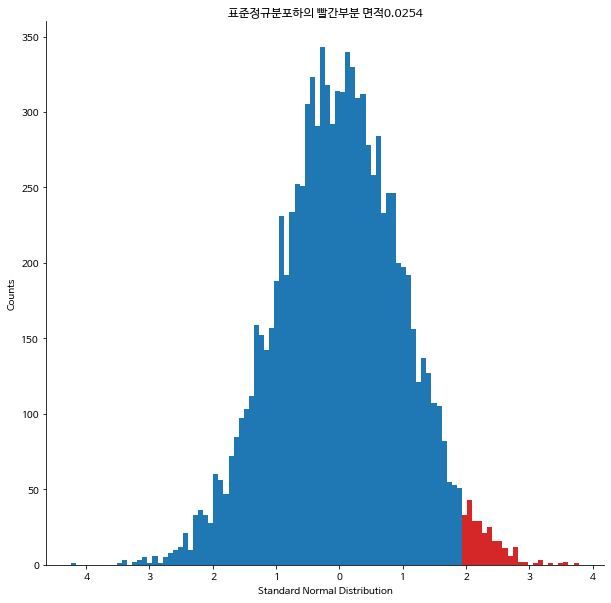

In [ ]:
# Z 값에 따라 색깔이 다른 히스토그램 그리기

f, ax = plt.subplots()
f.set_size_inches(10,10) # 캔번스(전반적인 이미지) 사이즈 바꾸기 

ax.hist(np0_a, bins=bins, color="tab:blue") # 1.96보다 작은 값은 파란색으로
ax.hist(np0_b, bins=bins, color="tab:red") # 1.96보다 큰 값은 붉은 색으로 

ax.set(xlabel="Standard Normal Distribution", ylabel="Counts", title="표준정규분포하의 빨간부분 면적{}".format(len(np0_b)/len(np0)))

sns.despine()

표준정규분포에서 -1.96과 1.96사이에 있는 점수들의 면적은 (0.975-0.5)+(0.975-0.5)입니다. 이는 1.96과 0사이의 면적을 계산하기 위해서는 0.5를 제외하여야하고, -1.96과 9사이의 면적을 구하기 위해서는 음의 면적 범위를 구해야하기 때문입니다. 

In [ ]:
# Z 점수에 따라 데이터 분리 
np0_a = np0[(np0<=-1.96)]
np0_b = np0[(np0>-1.96) & (np0<=1.96)]
np0_c = np0[(np0>=1.96)]

In [ ]:
# 확률 구하기 
len(np0_b)/len(np0)

0.9505

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


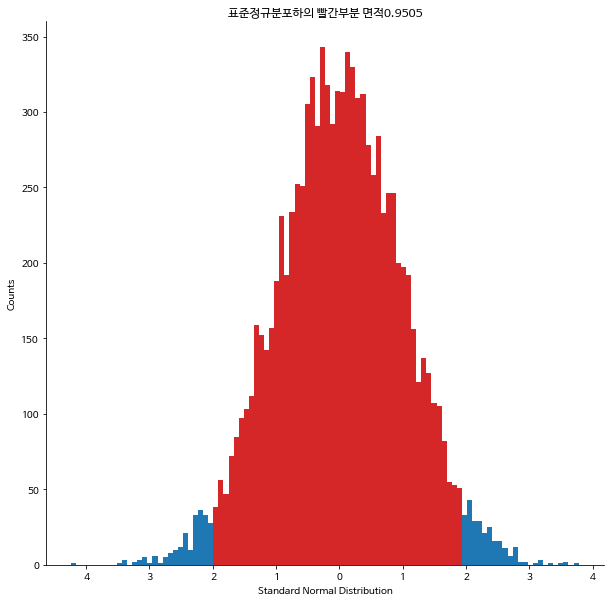

In [ ]:
# Z 값에 따라 다른 색깔이 다른 히스토그램 그리기
f, ax = plt.subplots()
f.set_size_inches(10,10) # 캔번스(전반적인 이미지) 사이즈 바꾸기 

ax.hist(np0_a, bins=bins, color="tab:blue")
ax.hist(np0_b, bins=bins, color="tab:red")
ax.hist(np0_c, bins=bins, color="tab:blue")

ax.set(xlabel="Standard Normal Distribution", ylabel="Counts", title="표준정규분포하의 빨간부분 면적{}".format(len(np0_b)/len(np0)))
sns.despine()